## powered flight trajectory algorithm

7.500000000000053  is the fuel mass expelled
2.0  is acceleration attained in m/s2 
3439.4788008276205  is the maximum altitude attained
168.32718784516155  is the velocity attained 


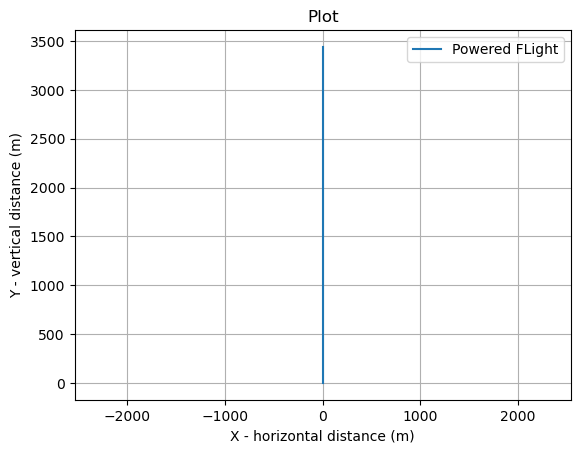

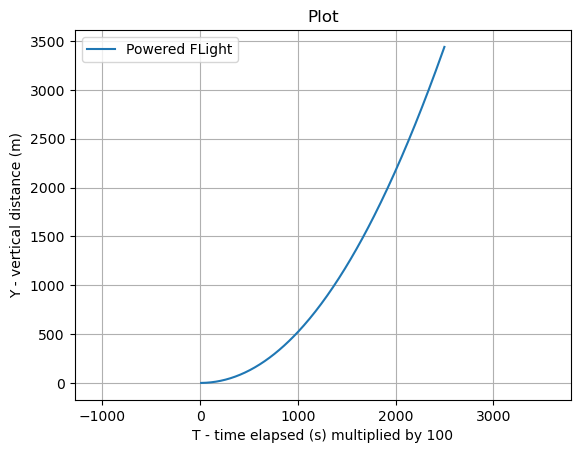

In [32]:
import numpy as np 
import matplotlib.pyplot as plt

# measured parameters
mi = 10 # initial mass in kg (both structure + fuel)
mf = 7.5 # final mass in kg (fuel exhausted) 
isp = 200 # specific impulse in sec
m_dot = 0.1 # mass flow rate in kg per sec
g = 9.81 # accerleration due to gravity

T = isp * m_dot # thrust force calculation 
acc = T/mi # acceleration due to thrust 

t = 0 
t_max = (mi - mf)/m_dot # maximum time in sec
dt = 0.1 # time step in sec

#initial values
x = 0
y = 0
vx = 0
vy = 0

x_list = []
y_list = []
t_list = []


while t <= t_max :
    # here T/mi gives g in terms of G value (N or kg) so we must multiply it with 9.81 to get in m/s2
    m = mi - (m_dot * 0.1) # why do we multiply 0.1 here?
    mi = m
    
    F_dx =  0.5 * 1.2 * vx**2 * 3.1415 * (0.05)**2 * 0.1# acc due to thrust is in forward direction and acc due to gravity is in backward direction 
    F_dy = 0.5 * 1.2 * vy**2 * 3.1415 * (0.05)**2 * 0.1
    
    dx = 0.5 * ( 0 - (F_dx/m)) * dt**2
    dy = 0.5 * (- g - (F_dy/m) + ((T/mi) * 9.81)) * dt ** 2
    
    dvx = 0
    dvy = (- g - (F_dy/m) + ((T/mi) * 9.81)) * dt

    x = x + (vx * dt) + dx
    y = y + (vy * dt) + dy
    vx = vx + dvx
    vy = vy + dvy
    t = t + dt
    
    x_list.append(x * 100)
    y_list.append(y)
    t_list.append(t * 100) # 100 multiplied just to scale up
    
print(m, " is the fuel mass expelled")
print(acc, " is acceleration attained in m/s2 ")
print(y, " is the maximum altitude attained"  )
print(v, " is the velocity attained ")


def plot_trajectory1(x_list, y_list) :
    plt.plot(x_list, y_list, label="Powered FLight")
    plt.title("Plot")
    plt.xlabel("X - horizontal distance (m)")
    plt.ylabel("Y - vertical distance (m)")
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()
plot_trajectory1(x_list, y_list)

def plot_trajectory3(t_list, y_list) :
    plt.plot(t_list, y_list, label="Powered FLight")
    plt.title("Plot")
    plt.xlabel("T - time elapsed (s) multiplied by 100")
    plt.ylabel("Y - vertical distance (m)")
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()
plot_trajectory3(t_list, y_list)

## projectile motion

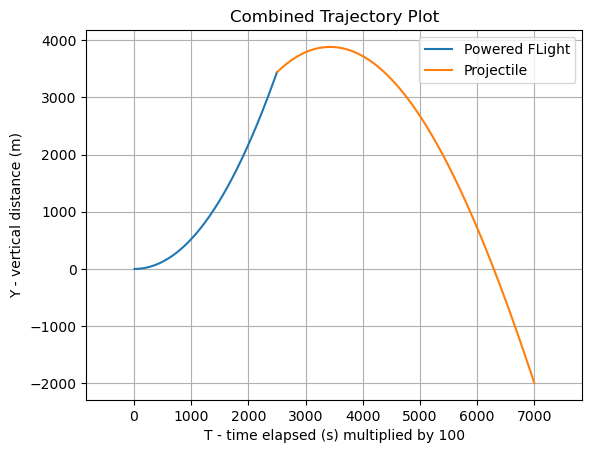

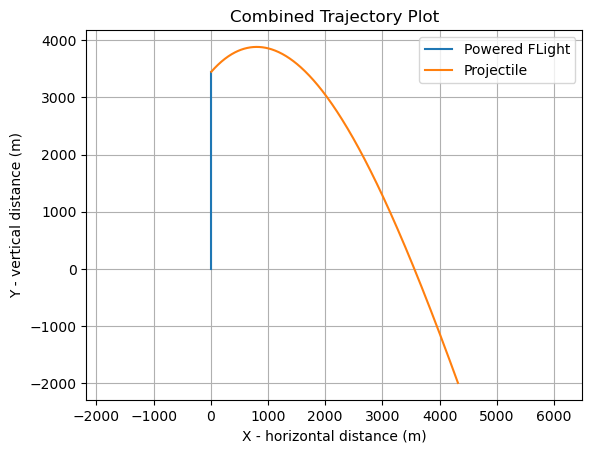

In [41]:
v0 = v # initial velocity here is taken as the velocity attained earlier
angle = 60 #launch angle
angle_radians = np.radians(angle)
ang_acc = np.radians(90) # direction of gravity

v0x = v0 * np.cos(angle_radians)
v0y = v0 * np.sin(angle_radians)

total_time = t_max + (2 * v0y) / g # total trajectory time

t1 = t_max
dt1 = 0.1

x1 = 0 
y1 = y 

x1_list = []
y1_list = []
t1_list = []

while t1 <= 70:
    
    F_d_x = 0.5 * 1.2 * v0x**2 * 3.1415 * (0.05)**2 * 0.1 
    F_d_y = 0.5 * 1.2 * v0y**2 * 3.1415 * (0.05)**2 * 0.1
    
    dx1 = 0.5 * (0) - (F_d_x/m) * (dt1**2)
    dy1 = 0.5 * (- 9.81) - (F_d_y/m) * (dt1**2) 
    
    dvx = (F_d_x / m) * dt1
    
    if v0y >= 0:
        dvy = ((- g * m - F_d_y) / m) * dt1
    else:
        dvy = ((- g * m + F_d_y) / m) * dt1
    
    x1 += (v0x * dt1) + dx1
    y1 += (v0y * dt1) + dy1
    v0x = v0x + dvx
    v0y = v0y + dvy
    t1 = t1 + dt1
    
    x1_list.append(x1)
    y1_list.append(y1)
    t1_list.append(t1 * 100)

def plot_trajectory(t_list, y_list, t1_list, y1_list) :
    plt.plot(t_list, y_list, label="Powered FLight")
    plt.plot(t1_list, y1_list, label="Projectile")
    plt.title("Combined Trajectory Plot")
    plt.xlabel("T - time elapsed (s) multiplied by 100")
    plt.ylabel("Y - vertical distance (m)")
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()
plot_trajectory(t_list, y_list, t1_list, y1_list)


def plot_trajectory2(x_list, y_list, x1_list, y1_list) :
    plt.plot(x_list, y_list, label="Powered FLight")
    plt.plot(x1_list, y1_list, label="Projectile")
    plt.title("Combined Trajectory Plot")
    plt.xlabel("X - horizontal distance (m)")
    plt.ylabel("Y - vertical distance (m)")
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()
plot_trajectory2(x_list, y_list, x1_list, y1_list)